In [1]:
import kagglehub

c:\Users\miles\Desktop\DSMP\Projects\Hybrid-Recommender-System\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# download the dataset from kaggle

kagglehub.dataset_download("undefinenull/million-song-dataset-spotify-lastfm")

'C:\\Users\\miles\\.cache\\kagglehub\\datasets\\undefinenull\\million-song-dataset-spotify-lastfm\\versions\\1'

In [3]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_path = Path("C:\\Users\\miles\\.cache\\kagglehub\\datasets\\undefinenull\\million-song-dataset-spotify-lastfm\\versions\\1")

songs_data_path = data_path / 'Music Info.csv'
users_data_path = data_path / 'User Listening History.csv'

In [5]:
songs_df = pd.read_csv(songs_data_path, usecols=["track_id","name","artist","spotify_preview_url"])

songs_df.head()

,track_id,name,artist,spotify_preview_url
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...


In [6]:
import dask.dataframe as dd

# Load the dataset
df = dd.read_csv(users_data_path)

# Check the first few rows to verify the data
df.head()
     

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [7]:
df.npartitions

9

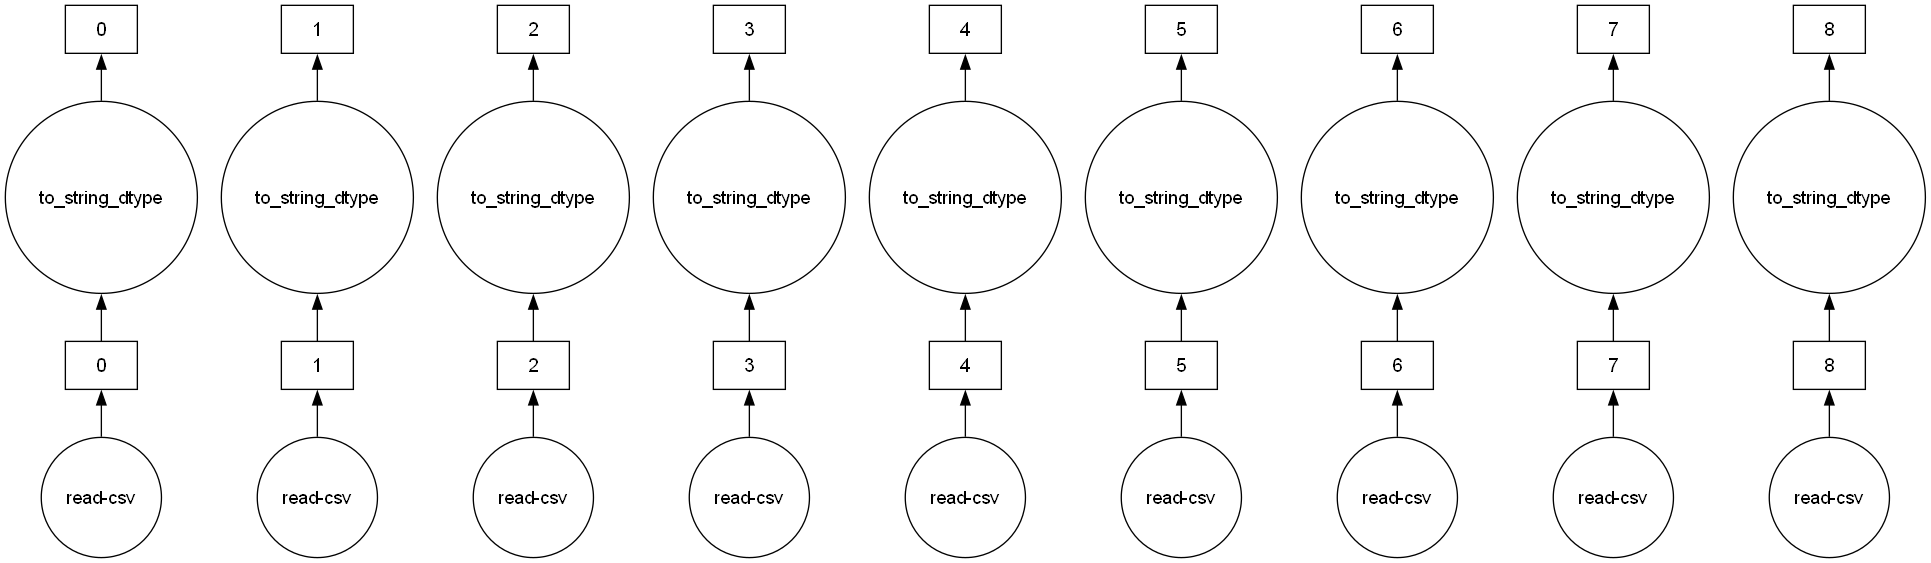

In [8]:
df.visualize(tasks=True)

In [11]:
# number of unique tracks in the data
unique_tracks = df['track_id'].nunique()

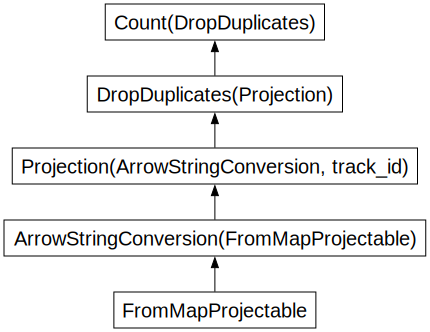

In [12]:
unique_tracks.visualize()

In [13]:
unique_tracks

<dask_expr.expr.Scalar: expr=(DropDuplicates(frame=ArrowStringConversion(frame=FromMapProjectable(71ac254))['track_id'], split_every=False)).count(), dtype=int64>

In [58]:
unique_tracks = unique_tracks.compute()

In [15]:
# number of users in the data
unique_users = df['user_id'].nunique().compute()
unique_users

962037

In [16]:
unique_tracks_ids = df['track_id'].unique().compute()
unique_tracks_ids

0       TRLXSNR128F429361D
1       TRPUGUW128F426BF6F
2       TRISTWT128F1488FBB
3       TRKPWGR128E078EE06
4       TRXQJWK128F146DF76
               ...        
3348    TRXQMQE128F42268ED
3349    TRAVLOL128F428206C
3350    TRPMWJF128F4292372
3351    TRRPLPU128F4275697
3352    TRDLVZX12903CC58EB
Name: track_id, Length: 30459, dtype: string

In [24]:
unique_track_ids = df['track_id'].unique().compute().values.tolist()

In [25]:
len(unique_track_ids)

30459

In [26]:
# filtered songs
filtered_songs = songs_df[songs_df['track_id'].isin(unique_track_ids)]
filtered_songs.reset_index(drop = True, inplace = True)

In [27]:
filtered_songs

,track_id,name,artist,spotify_preview_url
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...
2,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...
3,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...
4,TRUJIIV12903CA8848,Clocks,Coldplay,https://p.scdn.co/mp3-preview/24c7fe858b234e3c...
...,...,...,...,...
30454,TRXWSIN128F9339A11,Infinite Love Song,Maximilian Hecker,https://p.scdn.co/mp3-preview/8b3d529025fe3c60...
30455,TRPIGDW12903CDEB2D,Slip of the Lip,Fact,https://p.scdn.co/mp3-preview/cf64490291f9a600...
30456,TRQYCFV128F9322F50,Ryusei Rocket,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/d2668a5a3e0b1fda...
30457,TRHQCSH128F42724B7,Colors Of The Wind,ACIDMAN,https://p.scdn.co/mp3-preview/8e22a7052ef3ecf7...


In [28]:
filtered_songs[filtered_songs['name'] == 'Crazy in Love']

,track_id,name,artist,spotify_preview_url
3337,TROINZB128F932F740,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...


In [29]:
# form interaction matrix
# index -> track id
# columns -> user ids
# values -> play-count

In [30]:
# convert string names to integer

In [31]:
from scipy.sparse import csr_matrix

In [32]:
df = dd.read_csv(users_data_path)

In [33]:
df['playcount'] = df['playcount'].astype(np.float64)

In [34]:
df = df.categorize(columns=['user_id', 'track_id'])

In [35]:
user_mapping = df['user_id'].cat.codes
track_mapping = df['track_id'].cat.codes

In [36]:
df = df.assign(
    user_idx = user_mapping,
    track_idx = track_mapping
)

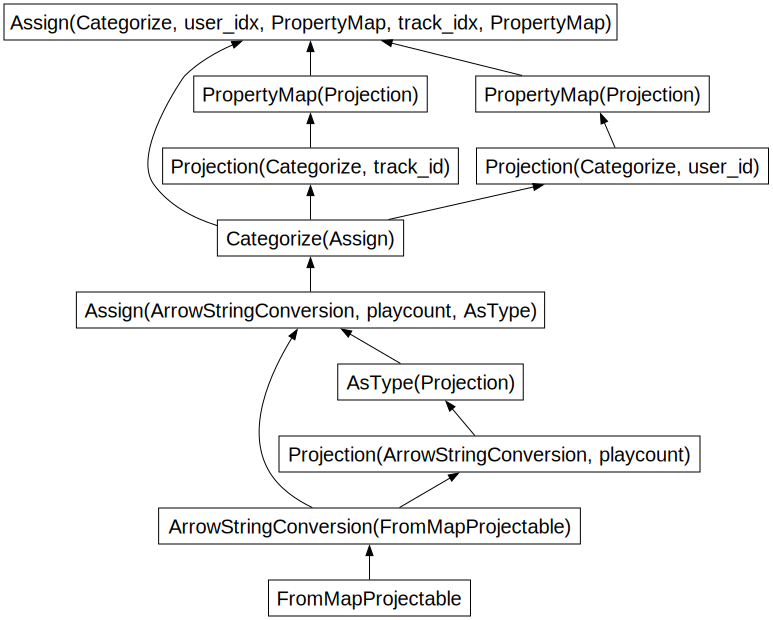

In [38]:
df.visualize()

In [46]:
df.compute().info()

<class 'pandas.core.frame.DataFrame'>
Index: 9711301 entries, 0 to 1079041
Data columns (total 5 columns):
 #   Column     Dtype   
---  ------     -----   
 0   track_id   category
 1   user_id    category
 2   playcount  float64 
 3   user_idx   int32   
 4   track_idx  int16   
dtypes: category(2), float64(1), int16(1), int32(1)
memory usage: 337.5 MB


In [39]:
df.compute()

,track_id,user_id,playcount,user_idx,track_idx
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,10705
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,7334
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,14212
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,23206
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1.0,691377,8936
...,...,...,...,...,...
1079037,TRBKFKL128E078ED76,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1.0,689479,1932
1079038,TRYFXPG128E078ECBD,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1.0,689479,28694
1079039,TROBUUZ128F4263002,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1.0,689479,16702
1079040,TROEWXC128F148C83E,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1.0,689479,16795


In [41]:
# create interaction matrix

In [47]:
interaction_array = df.groupby(['track_idx', 'user_idx'])['playcount'].sum().reset_index()

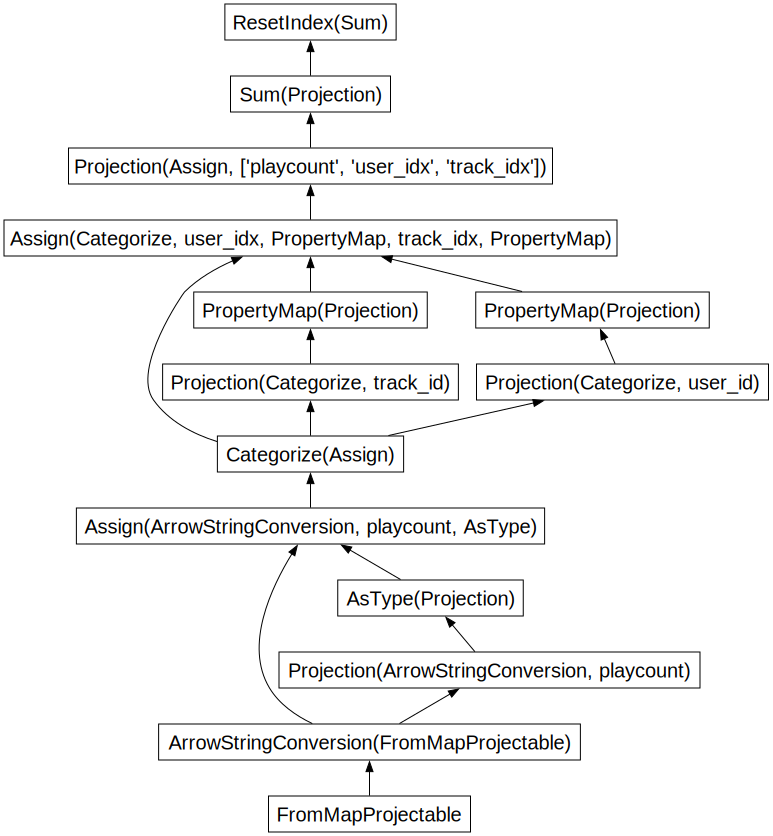

In [49]:
interaction_array.visualize()

In [50]:
interaction_array = interaction_array.compute()

In [51]:
interaction_array

,track_idx,user_idx,playcount
0,0,15780,3.0
1,0,76968,1.0
2,0,134525,2.0
3,0,231541,1.0
4,0,305348,1.0
...,...,...,...
9711296,30458,902360,1.0
9711297,30458,913310,1.0
9711298,30458,922319,1.0
9711299,30458,925779,1.0


In [52]:
row_indices = interaction_array['track_idx']
col_indices = interaction_array['user_idx']
values = interaction_array['playcount']

In [59]:
n_tracks = unique_tracks
n_users = unique_users

sparse_matrix = csr_matrix((values, (row_indices, col_indices)), shape=(n_tracks, n_users))

In [60]:
sparse_matrix.shape

(30459, 962037)

In [65]:
total_elements = sparse_matrix.shape[0]*sparse_matrix.shape[1]

In [61]:
sparse_matrix.nnz  # non zero elements

9711301

In [66]:
non_zero_elements = sparse_matrix.nnz

In [67]:
(non_zero_elements/total_elements)*100

0.033141335019756815

In [62]:
sparse_matrix

<30459x962037 sparse matrix of type '<class 'numpy.float64'>'
	with 9711301 stored elements in Compressed Sparse Row format>

In [63]:
row_indices

0              0
1              0
2              0
3              0
4              0
           ...  
9711296    30458
9711297    30458
9711298    30458
9711299    30458
9711300    30458
Name: track_idx, Length: 9711301, dtype: int16

In [64]:
col_indices

0           15780
1           76968
2          134525
3          231541
4          305348
            ...  
9711296    902360
9711297    913310
9711298    922319
9711299    925779
9711300    943722
Name: user_idx, Length: 9711301, dtype: int32

In [68]:
# cal sim score

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
ind = 17018

In [71]:
input_array = sparse_matrix[ind]
input_array

<1x962037 sparse matrix of type '<class 'numpy.float64'>'
	with 610 stored elements in Compressed Sparse Row format>

In [72]:
similarity_scores = cosine_similarity(input_array, sparse_matrix)

In [ ]:
np.sort(similarity_scores)[-6:][::-1] # top 6 scores

array([[0.        , 0.        , 0.        , ..., 0.07217127, 0.08225488,
        1.        ]])

In [74]:
similarity_scores.shape

(1, 30459)

In [75]:
np.argsort(similarity_scores.ravel())[-6:][::-1]

array([17018, 24529, 28964,  3620,  9470,  7882], dtype=int64)

In [77]:
recommendations = df['track_id'].cat.categories[np.argsort(similarity_scores.ravel())[-6:][::-1]]

In [78]:
recommendations

Index(['TROINZB128F932F740', 'TRURCEI12903CA4395', 'TRYLWIW12903CA438D',
       'TRCVMAF12903D00E61', 'TRHRNEE12903CFDBD4', 'TRGEUXY128F4226B26'],
      dtype='string', name='track_id')

In [79]:
filtered_songs[filtered_songs['name'] == 'Crazy in Love']

,track_id,name,artist,spotify_preview_url
3337,TROINZB128F932F740,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...


In [80]:
filtered_songs[filtered_songs['track_id'].isin(recommendations)]

,track_id,name,artist,spotify_preview_url
3337,TROINZB128F932F740,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...
8871,TRCVMAF12903D00E61,Delirium,Satyricon,https://p.scdn.co/mp3-preview/d039120c4f5f1e8d...
17287,TRGEUXY128F4226B26,Monday Massacre,Mr. Oizo,https://p.scdn.co/mp3-preview/4d6dbacc93e3ef7e...
26611,TRYLWIW12903CA438D,Dreadlock,Future Prophecies,https://p.scdn.co/mp3-preview/13ca5435549b0e46...
26701,TRURCEI12903CA4395,Bring the Noise,Future Prophecies,https://p.scdn.co/mp3-preview/d558b155fb9dcfe4...
27774,TRHRNEE12903CFDBD4,Lunar Sea,Camel,https://p.scdn.co/mp3-preview/8bf35f13a0ece173...


In [83]:
def collaborative_recommendation(song_name,user_data,songs_data,interaction_matrix,k=5):
    # fetch the row from songs data
    song_row = songs_data[songs_data["name"] == song_name]
    # track_id of input song
    input_track_id = song_row['track_id'].values.item()
    # index value of track_id
    ind = np.where(user_data['track_id'].cat.categories == input_track_id)[0].item()
    # fetch the input vector
    input_array = interaction_matrix[ind]
    # get similarity scores
    similarity_scores = cosine_similarity(input_array, interaction_matrix)
    # get top k recommendations
    recommendation_track_ids = df['track_id'].cat.categories[np.argsort(similarity_scores.ravel())[-k-1:][::-1]]
    # get top scores
    top_scores = np.sort(similarity_scores.ravel())[-k-1:][::-1]
    # get the songs from data and print
    temp_df = pd.DataFrame({"track_id":recommendation_track_ids.tolist(),
                            "score":top_scores})
    top_k_songs = (
                    songs_data
                    .loc[songs_data["track_id"].isin(recommendation_track_ids)]
                    .merge(temp_df,on="track_id")
                    .sort_values(by="score",ascending=False)
                    .drop(columns=["track_id","score"])
                    .reset_index(drop=True)
                    )
    return top_k_songs

In [84]:

collaborative_recommendation(song_name="Crazy in Love",
                             user_data=df,
                             songs_data=filtered_songs,
                             interaction_matrix=sparse_matrix)

,name,artist,spotify_preview_url
0,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...
1,Bring the Noise,Future Prophecies,https://p.scdn.co/mp3-preview/d558b155fb9dcfe4...
2,Dreadlock,Future Prophecies,https://p.scdn.co/mp3-preview/13ca5435549b0e46...
3,Delirium,Satyricon,https://p.scdn.co/mp3-preview/d039120c4f5f1e8d...
4,Lunar Sea,Camel,https://p.scdn.co/mp3-preview/8bf35f13a0ece173...
5,Monday Massacre,Mr. Oizo,https://p.scdn.co/mp3-preview/4d6dbacc93e3ef7e...
